# Initialization

In [50]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [51]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Data Statistics

In [52]:
df_train.head()

,id,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,reservation_status
0,0,Resort Hotel,312,2017,March,10,5,2,5,2,...,A,0,No Deposit,298.0,NaN,0,Transient-Party,56.0,0,0
1,1,City Hotel,2,2015,December,51,18,0,2,2,...,D,1,No Deposit,9.0,NaN,0,Transient,97.0,0,1
2,2,City Hotel,41,2016,March,14,31,0,3,2,...,A,0,No Deposit,9.0,NaN,0,Transient,117.9,0,1
3,3,Resort Hotel,228,2016,August,36,29,2,5,2,...,D,0,No Deposit,175.0,NaN,0,Transient,86.4,0,1
4,4,City Hotel,128,2017,May,19,13,0,1,3,...,A,0,No Deposit,9.0,NaN,0,Transient,144.0,0,1


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75636 entries, 0 to 75635
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              75636 non-null  int64  
 1   hotel                           75636 non-null  object 
 2   lead_time                       75636 non-null  int64  
 3   arrival_date_year               75636 non-null  int64  
 4   arrival_date_month              75636 non-null  object 
 5   arrival_date_week_number        75636 non-null  int64  
 6   arrival_date_day_of_month       75636 non-null  int64  
 7   stays_in_weekend_nights         75636 non-null  int64  
 8   stays_in_week_nights            75636 non-null  int64  
 9   adults                          75636 non-null  int64  
 10  children                        75633 non-null  float64
 11  babies                          75636 non-null  int64  
 12  meal                            

In [54]:
df_train.describe()

,id,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,reservation_status
count,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,75633.000000,75636.000000,75636.000000,75636.000000,75636.000000,75636.000000,65369.000000,4287.000000,75636.000000,75636.000000,75636.000000,75636.000000
mean,37817.500000,104.216841,2016.158351,27.191509,15.782921,0.929531,2.506650,1.856946,0.103764,0.007563,0.031361,0.086348,0.139999,0.221046,86.723172,189.899697,2.316146,101.932624,0.062602,0.636046
std,21834.376817,106.797344,0.706349,13.618039,8.770960,1.002940,1.923848,0.564948,0.396923,0.093249,0.174292,0.838637,1.525138,0.648692,110.755189,132.540272,17.523782,51.928827,0.245124,0.481139
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18908.750000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.000000,0.000000,0.000000
50%,37817.500000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,95.000000,0.000000,1.000000
75%,56726.250000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,274.000000,0.000000,126.000000,0.000000,1.000000
max,75635.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,3.000000,9.000000,1.000000,26.000000,72.000000,20.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,1.000000


In [55]:
df_train['reservation_status'].value_counts()

reservation_status
1    48108
0    27528
Name: count, dtype: int64

In [56]:
df_train.isna().sum()

id                                    0
hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             325
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10267
company                           71349


In [57]:
df_train.nunique()

id                                75636
hotel                                 2
lead_time                           474
arrival_date_year                     3
arrival_date_month                   12
arrival_date_week_number             53
arrival_date_day_of_month            31
stays_in_weekend_nights              17
stays_in_week_nights                 34
adults                               11
children                              4
babies                                4
meal                                  5
country                             164
market_segment                        8
distribution_channel                  5
is_repeated_guest                     2
previous_cancellations               15
previous_bookings_not_canceled       61
reserved_room_type                   10
assigned_room_type                   11
booking_changes                      20
deposit_type                          3
agent                               310
company                             318


# Exploratory Data Analysis

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

## Hotel Distribution

hotel
City Hotel      50262
Resort Hotel    25374
Name: count, dtype: int64


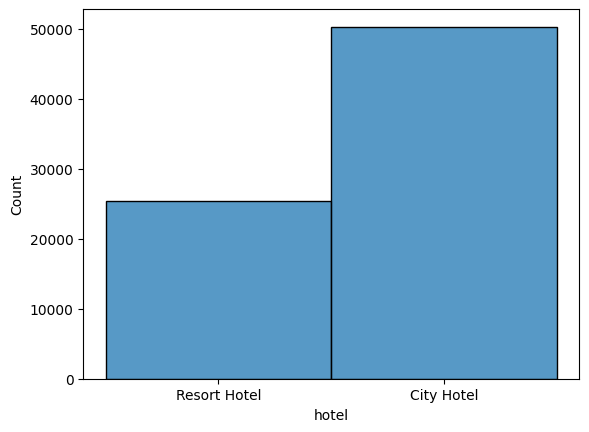

In [59]:
sns.histplot(data=df_train['hotel'])
print(df_train['hotel'].value_counts())

## Reservation Status Distribution

reservation_status
1    48108
0    27528
Name: count, dtype: int64


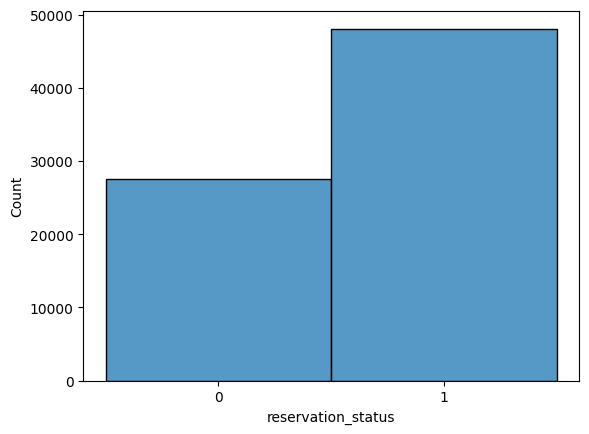

In [60]:
str_train = df_train.copy()
str_train.drop("id",axis=1,inplace=True)
str_train['reservation_status'] = str_train['reservation_status'].astype("string")
sns.histplot(data=str_train,x="reservation_status",bins=2,discrete=True)
print(df_train['reservation_status'].value_counts())

### Respect to Lead Time

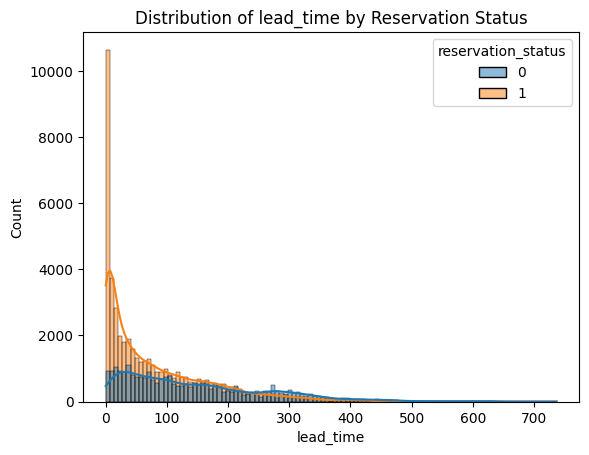

In [61]:
col = 'lead_time'
plt.figure()
sns.histplot(data=str_train, x=col,hue='reservation_status',kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.show()

### Respect to Arrival Year

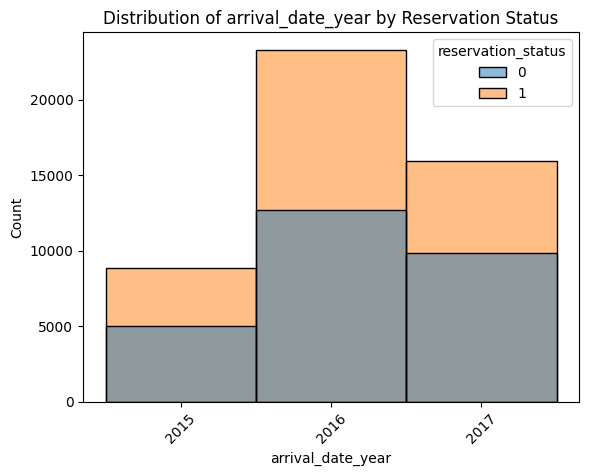

In [62]:
col = 'arrival_date_year'
year_order = [2015, 2016, 2017]
str_train[col] = pd.Categorical(str_train[col], categories=year_order, ordered=True)
plt.figure()
plt.xticks(ticks=year_order,rotation=45)
sns.histplot(data=str_train, x=col,hue='reservation_status',bins=3,discrete=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.show()

#### Success rates by year

In [63]:
for i in year_order:
    print(f'{i} reservation distribution : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()}')
    print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')

2015 reservation distribution : reservation_status
1    8836
0    4992
Name: count, dtype: Int64
2015 success rate : 63.90%
2016 reservation distribution : reservation_status
1    23303
0    12700
Name: count, dtype: Int64
2016 success rate : 64.73%
2017 reservation distribution : reservation_status
1    15969
0     9836
Name: count, dtype: Int64
2017 success rate : 61.88%


C:\Users\jason\AppData\Local\Temp\ipykernel_18552\3331307246.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')
C:\Users\jason\AppData\Local\Temp\ipykernel_18552\3331307246.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} success rate : {str_train[str_train["arrival_date_year"]==i]["reservation_status"].value_counts()[0]/str_train[str_train["arrival_date_year"]==i].shape[0] *100:.2f}%')
C:\Users\jason\AppData\Local\Temp\ipyk

### Respect to Arrival Month

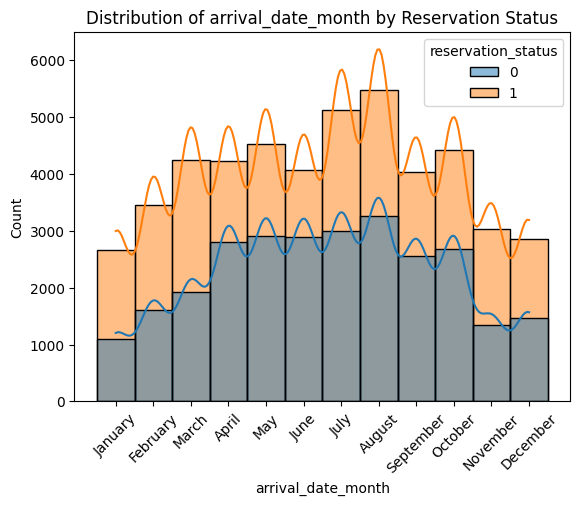

In [64]:
col = 'arrival_date_month'
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
str_train[col] = pd.Categorical(str_train[col], categories=month_order, ordered=True)

# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True, bins=len(month_order))
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Arrival Week

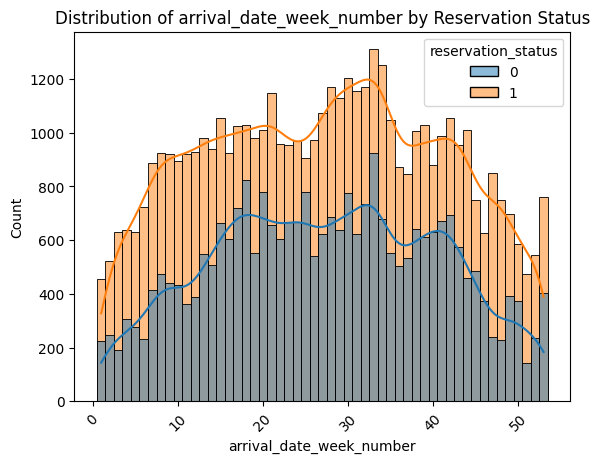

In [65]:
col = 'arrival_date_week_number'
week_order = [i for i in range(1,54)]
str_train[col] = pd.Categorical(str_train[col], categories=week_order, ordered=True)

# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True, bins=len(week_order))
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Arrival Date

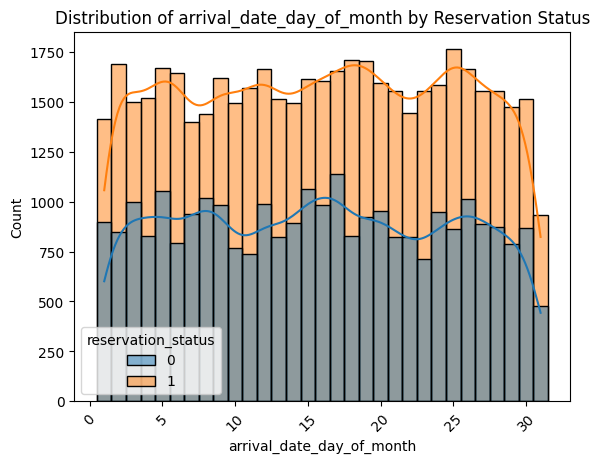

In [66]:
col = 'arrival_date_day_of_month'
date_order = [i for i in range(1,32)]
str_train[col] = pd.Categorical(str_train[col], categories=date_order, ordered=True)

# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True, bins=len(date_order))
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Weekend Nights

stays_in_weekend_nights
0     32914
2     21154
1     19369
4      1177
3       795
6       100
5        52
8        43
7        10
9         7
12        5
10        3
16        2
13        2
14        1
18        1
19        1
Name: count, dtype: int64


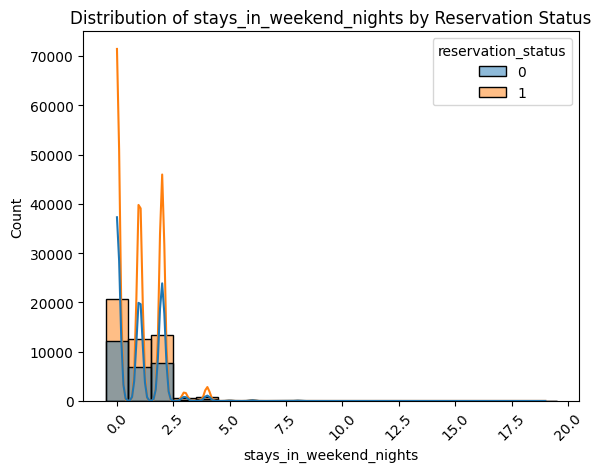

In [67]:
col = 'stays_in_weekend_nights'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status', kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Outlier Values

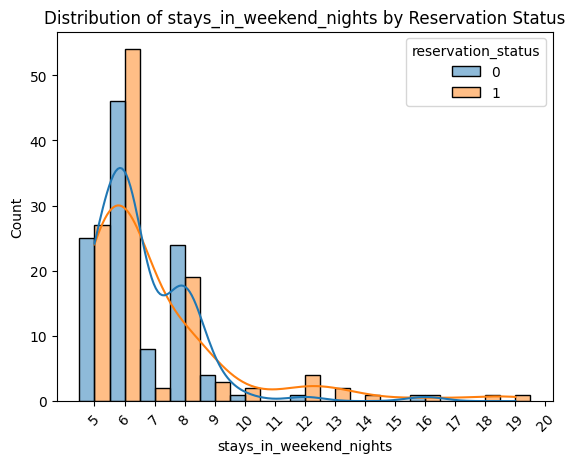

In [68]:
col = 'stays_in_weekend_nights'
many_weekend_nights = str_train[str_train[col] > 4]
# Create the histogram plot
plt.figure()
sns.histplot(data=many_weekend_nights, x=col, discrete=True, hue='reservation_status',multiple="dodge", kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[i for i in range(5,21)],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Weekday Nights

stays_in_week_nights
2     21247
1     19244
3     14134
5      7034
4      6110
0      4781
6       949
10      677
7       647
8       419
9       139
15       54
11       34
19       32
20       29
12       24
14       19
13       16
21       11
16        9
22        5
30        4
18        3
24        3
25        2
17        2
42        1
40        1
41        1
32        1
33        1
50        1
26        1
34        1
Name: count, dtype: int64


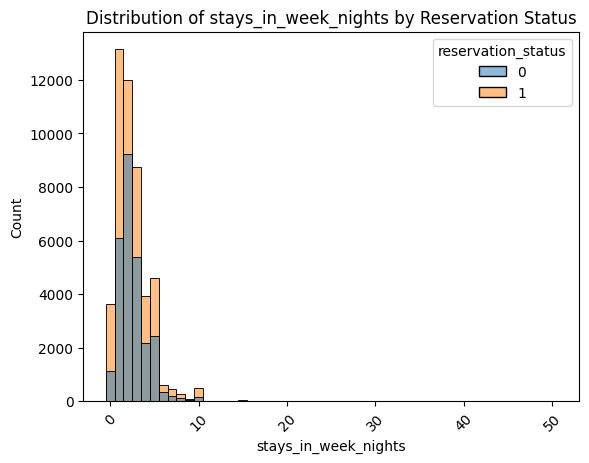

In [69]:
col = 'stays_in_week_nights'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Outlier Values

reservation_status
1    2023
0    1063
Name: count, dtype: Int64


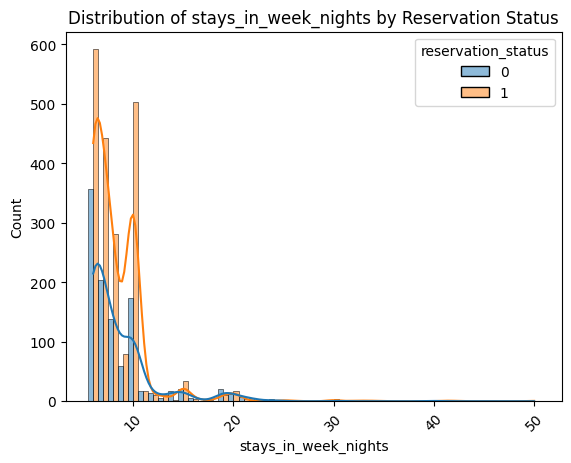

In [70]:
col = 'stays_in_week_nights'
many_week_nights = str_train[str_train[col] > 5]
many_week_nights=many_week_nights.sort_values(by="reservation_status", ascending=True)
print(many_week_nights['reservation_status'].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=many_week_nights, x=col, discrete=True, hue='reservation_status',multiple="dodge", kde=True)
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Adults

adults
2     56716
1     14607
3      4008
0       252
4        43
26        2
27        2
20        2
5         2
6         1
55        1
Name: count, dtype: int64


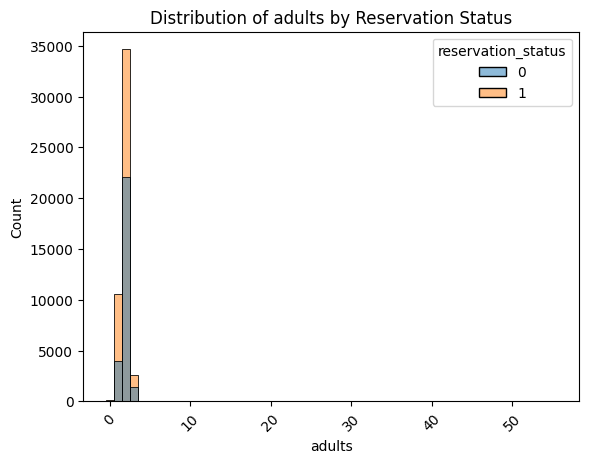

In [71]:
col = 'adults'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Outlier Values

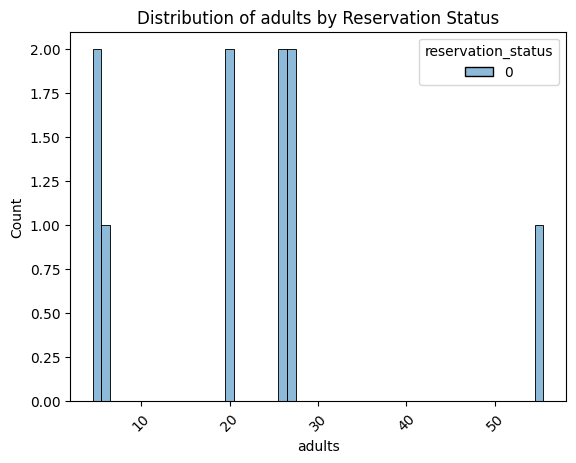

In [72]:
col = 'adults'
many_adults = str_train[str_train[col] > 4]
# Create the histogram plot
plt.figure()
sns.histplot(data=many_adults, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Children

children
0.0    70179
1.0     3107
2.0     2300
3.0       47
Name: count, dtype: int64


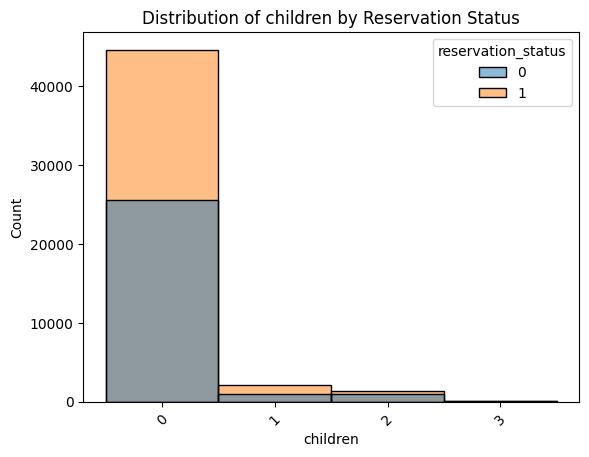

In [73]:
col = 'children'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[0,1,2,3],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#### Have Children

1 child(s) reservation distribution : reservation_status
1    2106
0    1001
Name: count, dtype: Int64
1 child(s) success rate : 67.78%
2 child(s) reservation distribution : reservation_status
1    1326
0     974
Name: count, dtype: Int64
2 child(s) success rate : 57.65%
3 child(s) reservation distribution : reservation_status
1    33
0    14
Name: count, dtype: Int64
3 child(s) success rate : 70.21%


C:\Users\jason\AppData\Local\Temp\ipykernel_18552\1347835897.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} child(s) success rate : {have_children[have_children["children"]==i]["reservation_status"].value_counts()[0]/have_children[have_children["children"]==i].shape[0] *100:.2f}%')
C:\Users\jason\AppData\Local\Temp\ipykernel_18552\1347835897.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{i} child(s) success rate : {have_children[have_children["children"]==i]["reservation_status"].value_counts()[0]/have_children[have_children["children"]==i].shape[0] *100:.2f}%')
C:\Users\jason\AppData\L

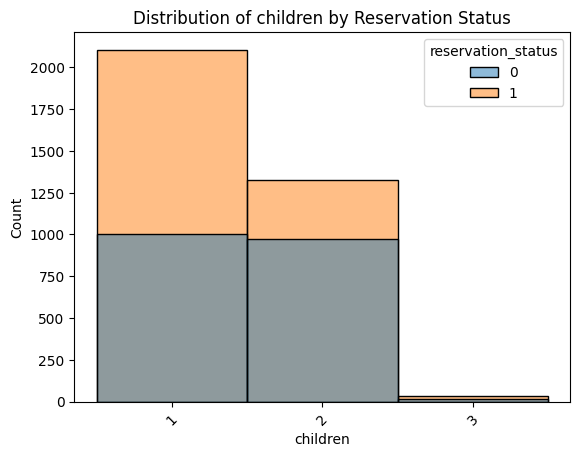

In [74]:
col = 'children'
have_children = str_train[str_train[col] > 0]
have_children = have_children.sort_values(by="reservation_status", ascending=True)
for i in range(1,4):
    print(f'{i} child(s) reservation distribution : {have_children[have_children["children"]==i]["reservation_status"].value_counts()}')
    print(f'{i} child(s) success rate : {have_children[have_children["children"]==i]["reservation_status"].value_counts()[0]/have_children[have_children["children"]==i].shape[0] *100:.2f}%')
# Create the histogram plot
plt.figure()
sns.histplot(data=have_children, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[1,2,3],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Babies

babies
0    75081
1      545
2        9
9        1
Name: count, dtype: int64


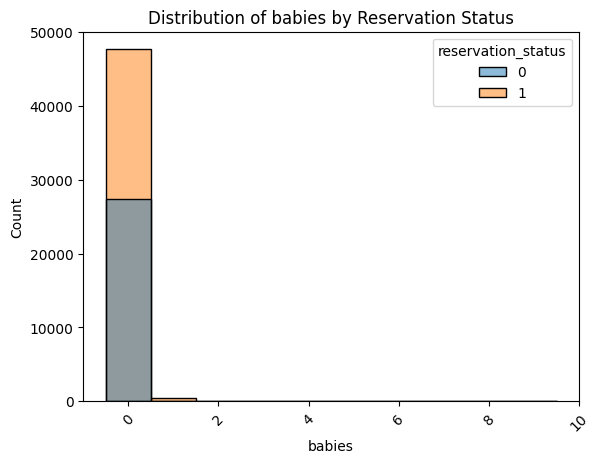

In [75]:
col = 'babies'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Meal

meal
BB           58566
HB            9199
SC            6628
Undefined      746
FB             497
Name: count, dtype: int64


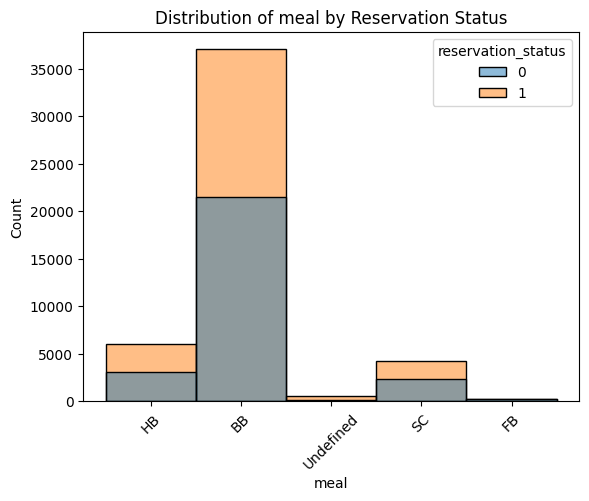

In [77]:
col = 'meal'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Country

75311
country
PRT    30643
GBR     7690
FRA     6698
ESP     5384
DEU     4689
ITA     2370
IRL     2160
BEL     1474
BRA     1412
USA     1356
NLD     1344
CHE     1088
CN       840
AUT      781
SWE      678
CHN      622
POL      602
ISR      403
NOR      386
RUS      385
Name: count, dtype: int64


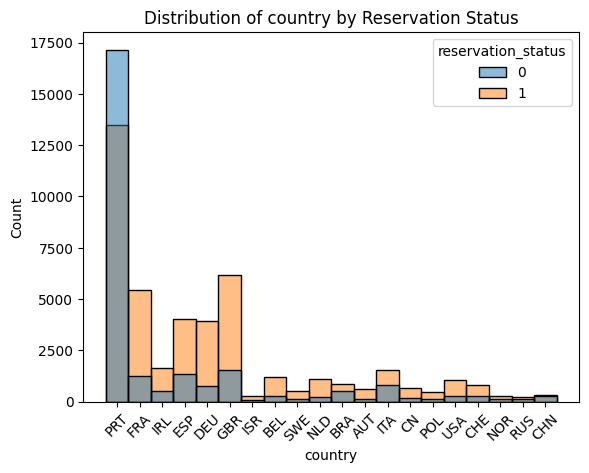

In [78]:
col = 'country'
print(str_train[col].value_counts().sum())
print(str_train[col].value_counts()[:20])
top_20_countries = str_train[str_train[col].isin(str_train[col].value_counts()[:20].index)]
# Create the histogram plot
plt.figure()
sns.histplot(data=top_20_countries, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [79]:
col = 'country'
countries_less_than_100 = str_train[str_train[col].map(str_train[col].value_counts()) < 100]
print(countries_less_than_100[col].nunique())
print(countries_less_than_100["reservation_status"].value_counts())


131
reservation_status
1    1307
0     545
Name: count, dtype: Int64


In [80]:
col = 'country'
print(str_train[col].isna().sum())
no_country = str_train[str_train[col].isna()]
print(no_country['reservation_status'].value_counts())


325
reservation_status
1    283
0     42
Name: count, dtype: Int64


### Respect to Market Segment

market_segment
Online TA        35794
Offline TA/TO    15416
Groups           12515
Direct            7891
Corporate         3400
Complementary      473
Aviation           146
Undefined            1
Name: count, dtype: int64


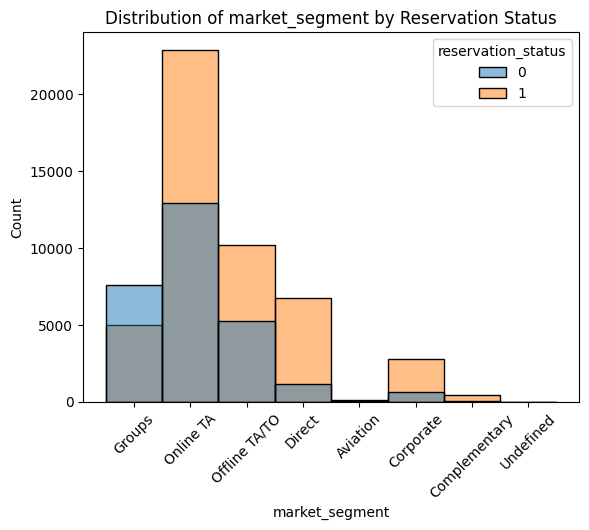

In [82]:
col = 'market_segment'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Distribution Channel

distribution_channel
TA/TO        62055
Direct        9201
Corporate     4248
GDS            128
Undefined        4
Name: count, dtype: int64


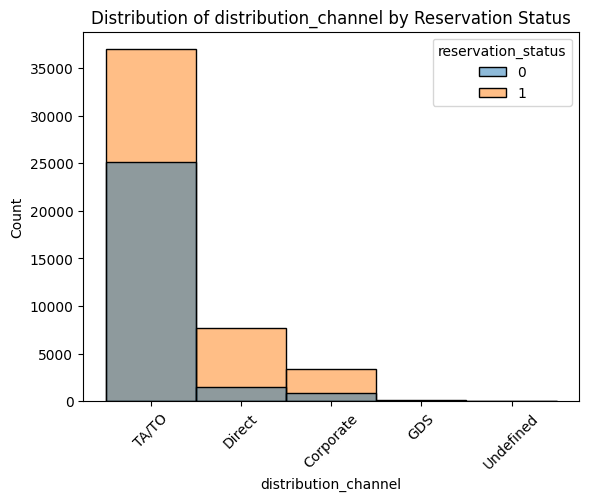

In [84]:
col = 'distribution_channel'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Repeated Guest

is_repeated_guest
0    73264
1     2372
Name: count, dtype: int64


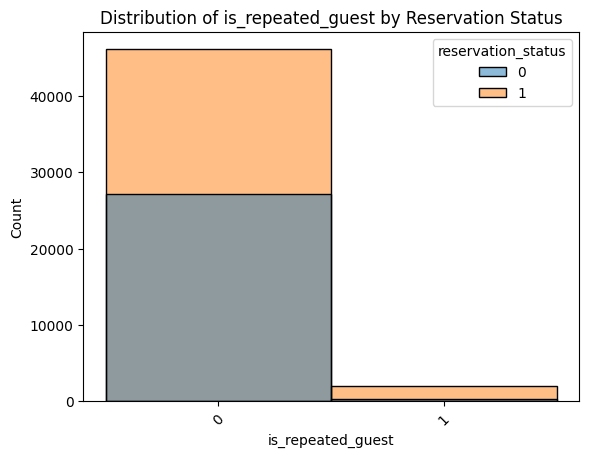

In [86]:
col = 'is_repeated_guest'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[0,1],rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Previous Cancellations

previous_cancellations
0     71553
1      3809
2        66
3        46
24       28
4        26
11       19
26       18
25       16
5        16
19       11
6        10
13        9
14        8
21        1
Name: count, dtype: int64


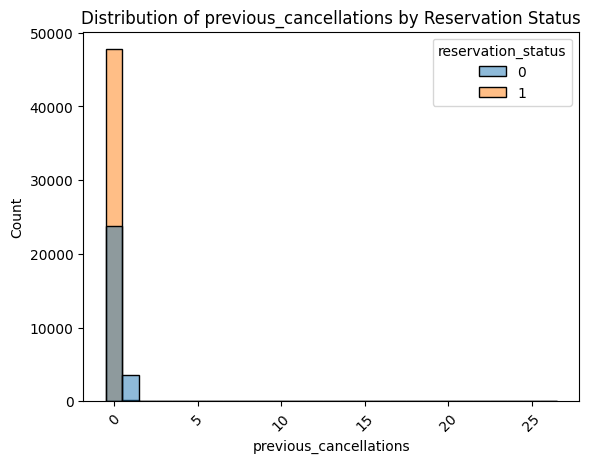

In [87]:
col = 'previous_cancellations'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Previous Bookings Not Canceled

Redundant with Has Cancelled so will be dropped

### Respect to Reserved Room Type

reserved_room_type
A    54353
D    12260
E     4121
F     1855
G     1347
B      715
C      575
H      398
P        9
L        3
Name: count, dtype: int64


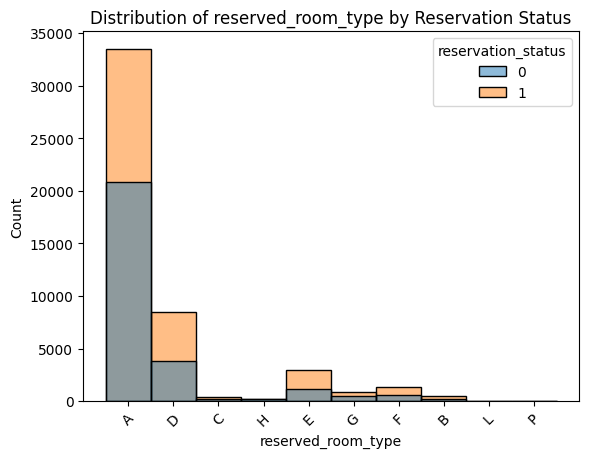

In [90]:
col = 'reserved_room_type'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Respect to Assigned Room Type

assigned_room_type
A    46802
D    16116
E     4934
F     2401
G     1658
C     1486
B     1367
H      465
I      220
K      178
P        9
Name: count, dtype: int64


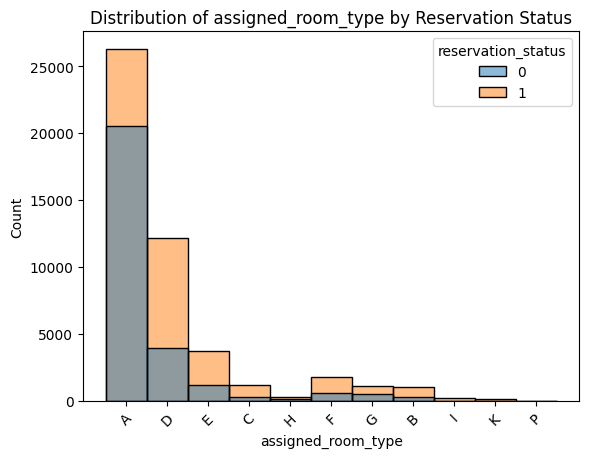

In [91]:
col = 'assigned_room_type'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

# Feature Engineering

## Previous Bookings Not Canceled Dropping

In [ ]:
str_train.drop("previous_bookings_not_canceled",axis=1,inplace=True)

## Has Baby Column
We will change this column into a bool column of having babies or not

In [ ]:
str_train["has_baby"] = [1 if i > 0 else 0 for i in str_train["babies"]]
print(str_train["has_baby"].value_counts())

has_baby
0    75081
1      555
Name: count, dtype: int64


## Impute NA Country with NO COUNTRY Label

In [ ]:
str_train["country"] = str_train["country"].fillna("Unknown")
print(str_train[col].isna().sum())

0


## Has Cancelled Binning

In [ ]:
str_train["has_cancelled"] = [1 if i > 0 else 0 for i in str_train["previous_cancellations"]]
print(str_train["has_cancelled"].value_counts())

has_cancelled
0    71553
1     4083
Name: count, dtype: int64


## Distribution Channel Binning

In [ ]:
str_train["n_channel"] = [i if i in ["TA/TO","Direct","Corporate"] else "Other" for i in str_train["distribution_channel"]]
print(str_train["n_channel"].value_counts())

n_channel
TA/TO        62055
Direct        9201
Corporate     4248
Other          132
Name: count, dtype: int64


## Market Segment Binning

In [ ]:
str_train["n_market"] = [i if i in ["Online TA","Offline TA/TO","Groups","Direct","Corporate"] else "Other" for i in str_train["market_segment"]]
print(str_train["n_market"].value_counts())

n_market
Online TA        35794
Offline TA/TO    15416
Groups           12515
Direct            7891
Corporate         3400
Other              620
Name: count, dtype: int64


## Different Reservation and Assigned Rooms

In [92]:
str_train["room_change"] = [1 if i != j else 0 for i,j in zip(str_train["reserved_room_type"],str_train["assigned_room_type"])]
print(str_train["room_change"].value_counts())

room_change
0    66217
1     9419
Name: count, dtype: int64


room_change
0    66217
1     9419
Name: count, dtype: int64


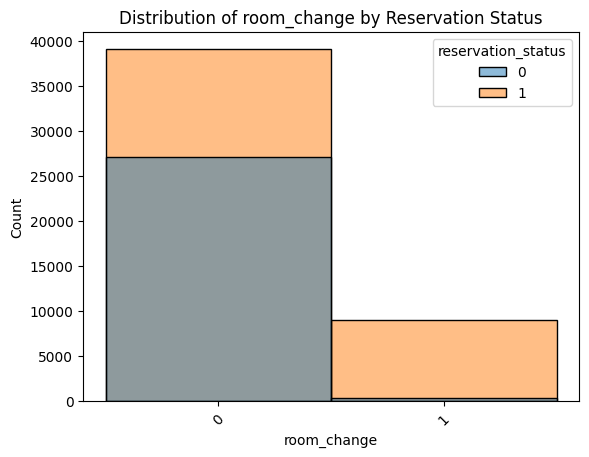

In [99]:
col = 'room_change'
print(str_train[col].value_counts())
# Create the histogram plot
plt.figure()
sns.histplot(data=str_train, x=col, discrete=True, hue='reservation_status')
plt.title(f'Distribution of {col} by Reservation Status')
plt.xticks(ticks=[0,1],rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [98]:
for i in range(0,2):
    print(f'{i} reservation distribution : {str_train[str_train["room_change"]==i]["reservation_status"].value_counts()}')
    print(f'{i} success rate : {str_train[str_train["room_change"]==i]["reservation_status"].value_counts().iloc[0]/str_train[str_train["room_change"]==i].shape[0] *100:.2f}%')

0 reservation distribution : reservation_status
1    39092
0    27125
Name: count, dtype: Int64
0 success rate : 59.04%
1 reservation distribution : reservation_status
1    9016
0     403
Name: count, dtype: Int64
1 success rate : 95.72%


As we can see, the entries where the rooms are changed yielded better reservation success rates. This is probably due to the fact that hotels would upgrade the room rather than downgrade it when they are overbooked, leading to better customer satisfaction

# Data Preparation

In [217]:
from sklearn.model_selection import train_test_split

In [ ]:
str_train.drop("id",inplace=True,axis=1)

In [ ]:
str_train = str_train.ffill()

In [ ]:
str_train = pd.DataFrame({col: str_train[col].astype('category').cat.codes for col in str_train}, index=str_train.index)

In [ ]:
str_train['reservation_status'].value_counts()

# Modelling

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_1 = CatBoostClassifier()

In [ ]:
cat_1.fit(str_train.drop("reservation_status",axis=1),str_train['reservation_status'])

# Predict

In [ ]:
test = df_test.drop("id",axis=1)

In [ ]:
test = pd.DataFrame({col: test[col].astype('category').cat.codes for col in test}, index=test.index)

In [ ]:
preds = cat_1.predict(test)

In [ ]:
preds.mean()

In [ ]:
fin = pd.DataFrame({'id': df_test.id, 'reservation_status': preds})
fin.to_csv('sub.csv',index=False)